In [3]:

import os
import numpy as np
import pandas as pd
#os.sep.join( )函数传入的参数是一个列表，输出的结果是将列表中的元素用相应平台对应的路径分隔符链接起来的整体
#os.path.join() 该函数传入的参数是多个字符串型变量
filepath = os.sep.join(['dataset'] + ['Iris_Data.csv'])
print(filepath)#打印路径
data = pd.read_csv(filepath)#加载数据
data.head()#打印前5行

dataset\Iris_Data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#• 数据点（行）的数量。 
print(data.shape[0])

#• 列名。 
print(data.columns.tolist())

#• 每列的数据类型。 
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [10]:
#检查品种名称并注意到都以“Iris-”开头。删除名称的这一部分，使物种名称更短
# 使用str 方法将以下函数作为字符串映射到每个条目
data['species'] = data.species.str.replace('Iris-', '')
#apply方法
#data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
#确定以下内容： 存在的每个物种的数量。 
#data.species.value_counts()
#每个花瓣和萼片测量值的平均值、中位数、分位数和范围（最大-最小） 
data.sepal_length.describe()#50%是中位数

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

在单独的数据框中计算每个品种的以下内容：
每个测量值的平均值（sepal_length、sepal_width、petal_length 和 petal_width）。
每个测量值的中位数。

In [19]:
data.groupby('species').mean()# .median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [21]:
#一次apply多个方法 DataFrame.agg（func，axis = 0，* args，** kwargs ）
#使用指定轴上的一个或多个操作进行聚合。
data.groupby('species').agg(['mean', 'median'])  #传递一串string的list
#data.groupby('species').agg([np.mean, np.median])  # 传递明确聚合属性的list

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [24]:
#如果一些属性需要不同方式聚合
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

使用 Matplotlib 制作 sepal_length 与 sepal_width 的散点图。
标记坐标轴并为绘图指定标题

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

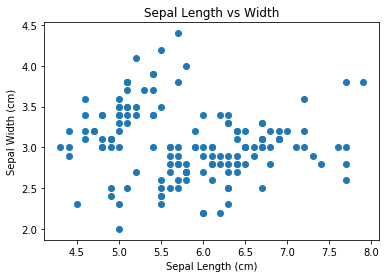

In [26]:

ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# 坐标轴设置Label 
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

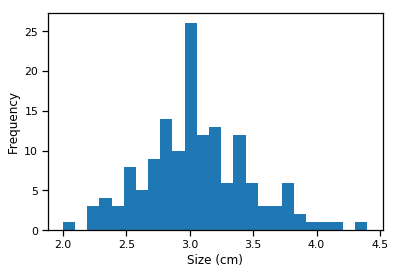

In [42]:
#制作四个特征中任何一个的直方图。标记轴并根据需要为其命名
ax = data.sepal_width.plot.hist(bins=25)
ax.set_xlabel('Size (cm)');
#alpha=0.5 颜色的透明度 ,stacked=True可以堆叠, bins=20指定分箱数量

现在为叠加的每个特征（petal_width、petal_length、sepal_width、sepal_length）创建一个带有直方图的单个图。
尝试在单个图中创建四个单独的直方图，其中每个图包含一个特征

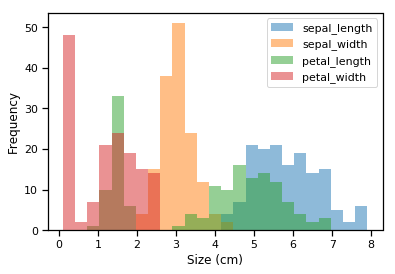

In [39]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

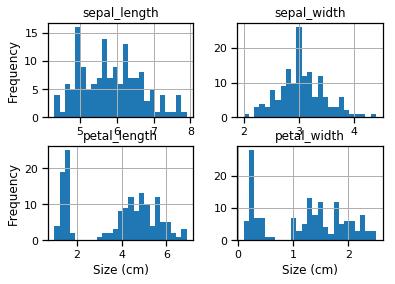

In [44]:
# 要创建四个单独的图，使用 Pandas `.hist` 方法
axList = data.hist(bins=25)

# 添加 x- 和 y- 给第一列和最后一行
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

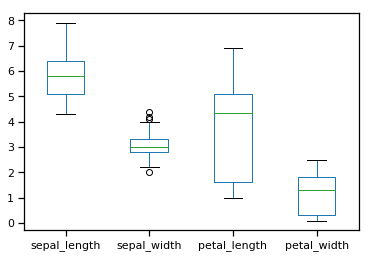

In [46]:
#使用 Pandas，制作每个花瓣和萼片测量值的箱线图。
data.plot.box()

现在制作一个单一的箱线图，其中特征在 x 轴上分开，物种用不同的色调着色。

另请注意，Seaborn 对数据格式非常挑剔——要使该图正常工作，需要对输入数据框进行操作，以便每一行都包含一个数据点（物种、测量类型和测量值）。

In [67]:
#reshape数据所以每列只有单一的度量方式
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [69]:
data.set_index('species').stack().to_frame().reset_index()
# reset_index 更改为新索引或扩展索引。

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


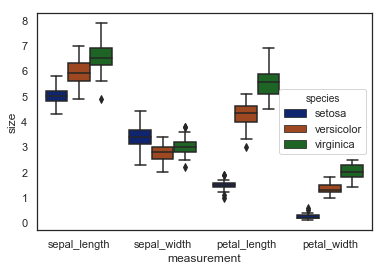

In [70]:

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

使用 Seaborn 制作配对图以检查每个测量值之间的相关性。
提示：这个情节可能看起来很复杂，但实际上只有一行代码。
这就是 Seaborn 和数据帧感知绘图的强大功能！

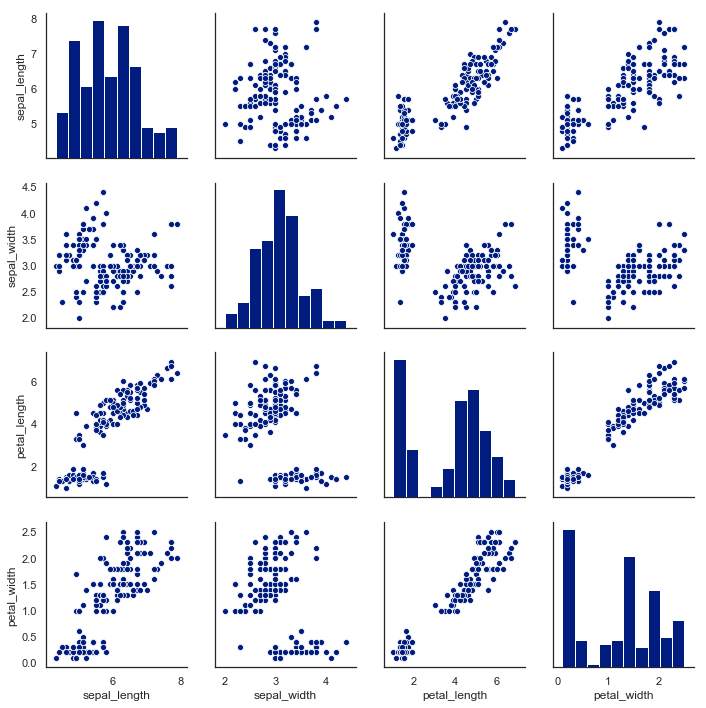

In [72]:
sns.pairplot(data)